<a href="https://www.kaggle.com/code/tusharaggarwal27/bank-term-deposit-analysis?scriptVersionId=122659071" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          💵Bank term deposit analysis💵
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
</p>


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this Project, I am building a model that predict term deposit application by individuals based on Bank term deposit dataset with H2O </b>
  </div>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Importing the required Packages
</p>

In [60]:
#Data manipulation imports
import numpy as np
import pandas as pd
pd.options.display.max_rows=999
#Data Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import h2o
from h2o.automl import H2OAutoML

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
#Additional imports
from math import sqrt

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Loading and checking data
</p>

In [10]:
xlsx =pd.ExcelFile("/kaggle/input/bank-term-deposit-marketing-analysis/bank_term_deposit_marketing_analysis.xlsx")

In [17]:
xlsx.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [18]:
client_info = pd.read_excel(xlsx, "CLIENT_INFO")
loan_info = pd.read_excel(xlsx, "LOAN_HISTORY")
marketing_info = pd.read_excel(xlsx, "MARKETING HISTORY")
subscription_info = pd.read_excel(xlsx, "SUBSCRIPTION HISTORY")

In [30]:
client_info.head(5)

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58.0,management,married,tertiary
1,2837,44.0,technician,single,secondary
2,2838,33.0,entrepreneur,married,secondary
3,2839,47.0,blue-collar,married,unknown
4,2840,33.0,unknown,single,unknown


In [25]:
loan_info.head(5)

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143.0,yes,no
1,2837,no,29.0,yes,no
2,2838,no,2.0,yes,yes
3,2839,no,1506.0,yes,no
4,2840,no,1.0,no,no


In [28]:
marketing_info.head(5)

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown
1,2837,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,2838,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,2839,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,2840,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown


In [29]:
subscription_info.head(5)

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [43]:
#Merging on 'id'
df = pd.merge(loan_info,client_info, on=['ID'])
df =pd.merge(df, marketing_info,on=['ID'] )
df =pd.merge(df, subscription_info, on=['ID'])
df.head(5)

,ID,DEFAULT,BALANCE,HOUSING,LOAN,AGE,JOB,MARITAL,EDUCATION,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,no,2143.0,yes,no,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,2837,no,29.0,yes,no,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,2838,no,2.0,yes,yes,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,2839,no,1506.0,yes,no,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,2840,no,1.0,no,no,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [44]:
#Droppinf "ID" column
df =df.drop(columns='ID')


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Data prepration for H2O
</p>

In [51]:
#Initalzing h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 mins 23 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_3nbtfo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [55]:
#Converting DataFrame to H2O frame
h2o_df= h2o.H2OFrame(df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [56]:
#Describing H2O Frame
h2o_df.describe()

Rows:45211
Cols:17

,DEFAULT,BALANCE,HOUSING,LOAN,AGE,JOB,MARITAL,EDUCATION,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,enum,int,enum,enum,int,enum,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,,-8019.0,,,18.0,,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,,1362.2720576850802,,,40.936210214328106,,,,,15.80641879188694,,258.1630797814691,2.763840658246891,40.197827962221574,0.5803233726305549,,
maxs,,102127.0,,,95.0,,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,,3044.7658291685234,,,10.618762040975398,,,,,8.32247615304459,,257.52781226517124,3.0980208832791747,100.12874599059825,2.3034410449312213,,
zeros,,3514,,,0,,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,no,2143.0,yes,no,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,no,29.0,yes,no,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,no,2.0,yes,yes,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [57]:
#Defining predictotors and response variables
train, test =h2o_df.split_frame(ratios=[0.75])
x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    H2O Training
</p>

In [65]:
#Initializing
aml =H2OAutoML(max_runtime_secs=600,
              exclude_algos=None,
              balance_classes=True, #For inbalanced 'TERM_DEPOSIT'
              stopping_metric='logloss',
              project_name='Bank_Deposits_1',
              seed=1)


In [66]:
#Training
%time aml.train(x=x,y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 7.07 s, sys: 633 ms, total: 7.7 s
Wall time: 10min 4s


key,value
Stacking strategy,cross_validation
Number of base models (used / total),14/22
# GBM base models (used / total),5/9
# XGBoost base models (used / total),6/7
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/3
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    AutoML leaderboard and Ensemble Exploration
</p>

In [67]:
# Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20230319_122915,0.936724,0.194235,0.634052,0.167446,0.248084,0.0615455
StackedEnsemble_AllModels_2_AutoML_1_20230319_122915,0.936707,0.194166,0.634445,0.152866,0.248073,0.0615402
StackedEnsemble_BestOfFamily_3_AutoML_1_20230319_122915,0.936461,0.194626,0.632428,0.154389,0.248359,0.0616822
StackedEnsemble_AllModels_1_AutoML_1_20230319_122915,0.936187,0.195105,0.628265,0.148448,0.248714,0.0618585
StackedEnsemble_BestOfFamily_4_AutoML_1_20230319_122915,0.936095,0.195391,0.62677,0.161447,0.248954,0.0619783
StackedEnsemble_BestOfFamily_2_AutoML_1_20230319_122915,0.935671,0.195866,0.625378,0.152201,0.249145,0.0620734
StackedEnsemble_BestOfFamily_1_AutoML_1_20230319_122915,0.935472,0.197197,0.624158,0.165325,0.249677,0.0623385
GBM_1_AutoML_1_20230319_122915,0.934943,0.20511,0.621897,0.160399,0.255023,0.0650365
GBM_2_AutoML_1_20230319_122915,0.933707,0.203651,0.618594,0.163369,0.253775,0.0644019
GBM_5_AutoML_1_20230319_122915,0.933203,0.201962,0.6252,0.18122,0.252517,0.0637646


In [71]:
se =aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [72]:
#Important base learners
metalearner.varimp()

[('DRF_1_AutoML_1_20230319_122915',
  0.7174748778343201,
  1.0,
  0.2543247578859492),
 ('GBM_1_AutoML_1_20230319_122915',
  0.5165401101112366,
  0.7199417374311418,
  0.18309900806416474),
 ('XGBoost_3_AutoML_1_20230319_122915',
  0.45757541060447693,
  0.6377580940334201,
  0.162197672854854),
 ('GBM_5_AutoML_1_20230319_122915',
  0.3243025839328766,
  0.4520054902992225,
  0.11495618688346951),
 ('XGBoost_grid_1_AutoML_1_20230319_122915_model_1',
  0.2022431343793869,
  0.28188183395334027,
  0.07168952917263059),
 ('GBM_grid_1_AutoML_1_20230319_122915_model_2',
  0.16610383987426758,
  0.231511715609678,
  0.05887916102019208),
 ('GBM_2_AutoML_1_20230319_122915',
  0.14854902029037476,
  0.20704421141373794,
  0.052656468939486174),
 ('XGBoost_grid_1_AutoML_1_20230319_122915_model_3',
  0.1159476786851883,
  0.1616052105338844,
  0.041100206042138),
 ('XGBoost_2_AutoML_1_20230319_122915',
  0.07451917231082916,
  0.10386311021197484,
  0.026414960357942156),
 ('XGBoost_grid_1_Aut

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Base learner exploration ('DRF_1_AutoML_1_20230319_122915')
</p>

In [74]:
#
model= h2o.get_model('DRF_1_AutoML_1_20230319_122915')

In [75]:
#
model.model_performance(test)

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.07893289440681883
RMSE: 0.28094998559675854
LogLoss: 0.26324755007548484
Mean Per-Class Error: 0.15364028687511708
AUC: 0.9278201883011497
AUCPR: 0.5931680307009956
Gini: 0.8556403766022993

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06751524190344473
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     8835  1060   0.1071   (1060.0/9895.0)
yes    257   1027   0.2002   (257.0/1284.0)
Total  9092  2087   0.1178   (1317.0/11179.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0675152    0.609315  299
max f2                       0.0388542    0.724943  332
max f0point5                 0.167923     0.589223  217
max accuracy                 0.172983     0.9067    214
max precision                0.974834     1         0
max recall                   8.97943e-06  1         399
max specificity              0.974834     1         0
max absolute_mcc             0.0675152    0.566835  299
max min_per_class_accuracy   0.0465203    0.857201  323
max mean_per_class_accuracy  0.0255681    0.86726   347
max tns                      0.974834     9895      0
max fns                      0.974834     1283      0
max fps                      8.97943e-06  9895      399
max tps                      8.97943e-06  1284      399
max tnr                      0.974834     1         0
max fnr                      0.974834     0.999221  0
max fpr                      8.97943e-06  1         399
max tpr                      8.97943e-06  1         399

Gains/Lift Table: Avg response rate: 11.49 %, avg score:  4.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100188                   0.536973           6.84073    6.84073            0.785714         0.648996     0.785714                    0.648996            0.0685358       0.0685358                  584.073   584.073            0.0661104
2        0.0200376                   0.429192           6.14111    6.49092            0.705357         0.480226     0.745536                    0.564611            0.0615265       0.130062                   514.111   549.092            0.124302
3        0.0300564                   0.358637           5.75243    6.24476            0.660714         0.391383     0.717262                    0.506869            0.0576324       0.187695                   475.243   524.476            0.178094
4        0.0400751                   0.304192           5.13055    5.96621            0.589286         0.329969     0.685268                    0.462644            0.0514019       0.239097                   413.055   496.621            0.224847
5        0.0500045                   0.273642           5.49051    5.87175            0.630631         0.289113     0.674419                    0.428186            0.0545171       0.293614                   449.051   487.175            0.275221
6        0.100009                    0.162391           4.67248    5.27211            0.536673         0.210183     0.605546                    0.319184            0.233645        0.527259                   367.248   427.211            0.482691
7        0.150013                    0.0969757          3.34861    4.63095            0.384615         0.127111     0.531902                    0.25516             0.167445        0.694704                   234.861   363.095          

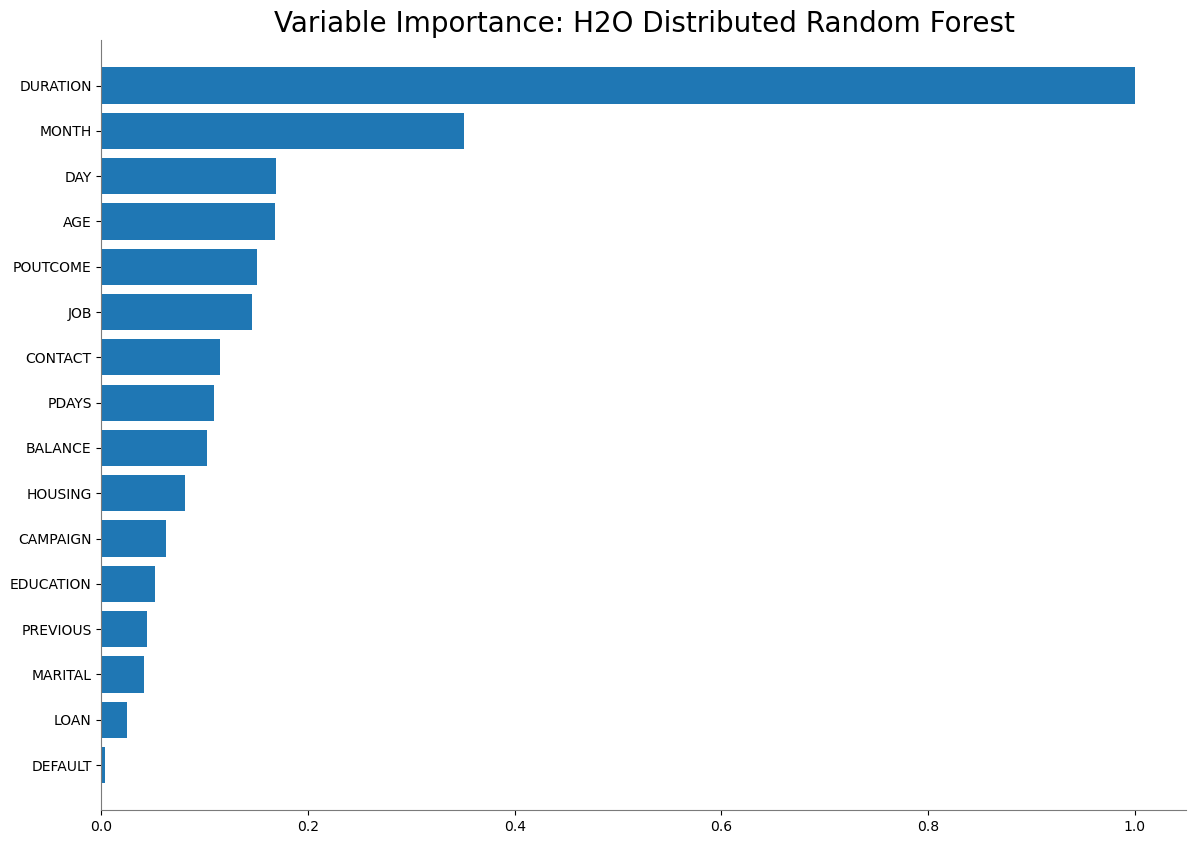

<Figure size 640x480 with 0 Axes>

In [77]:
#Variable importance
model.varimp_plot(num_of_features=20)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Web App coming soon!
</p>